In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./du lieu cung cap/Smarket.csv")
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [4]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


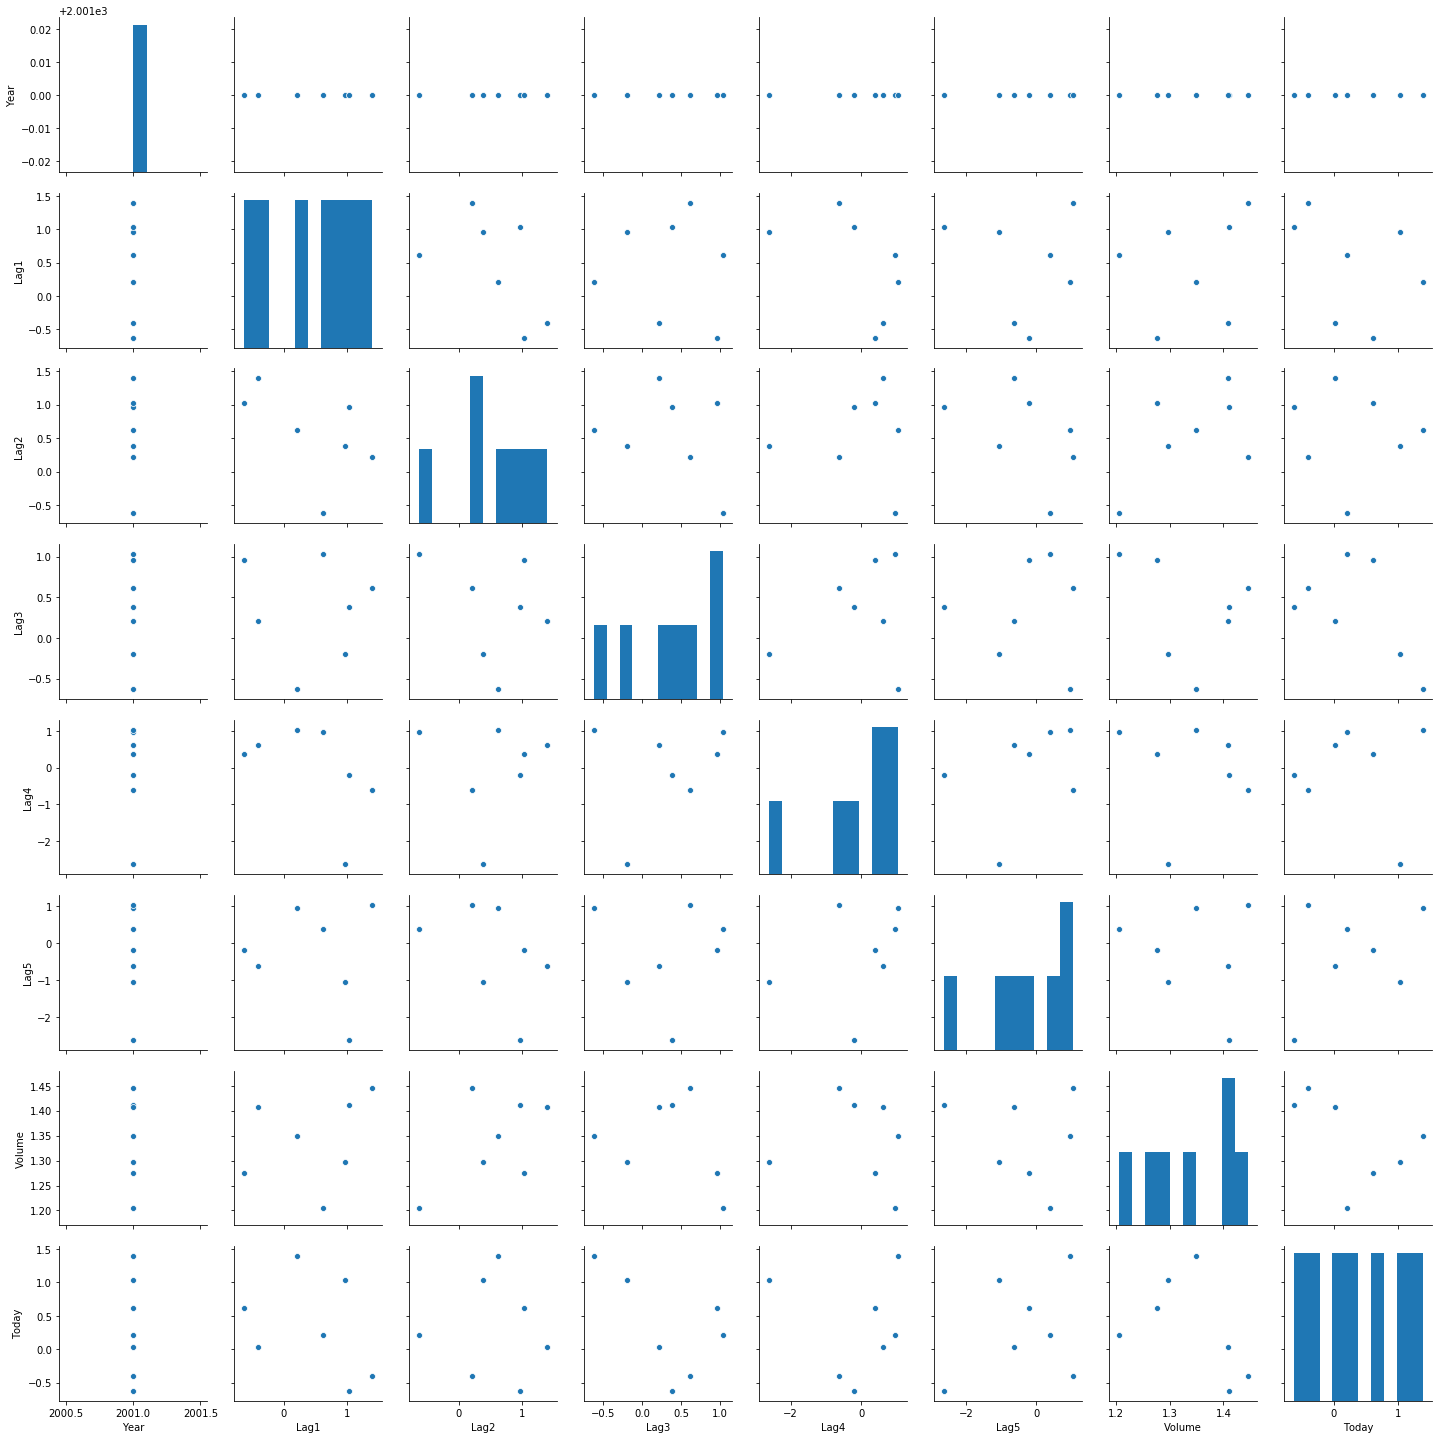

In [5]:
sns.pairplot(data[1:8])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.iloc[:,1:7]
y = data.iloc[:,-1]

In [8]:
X.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.381,-0.192,-2.624,-1.055,5.010,1.1913
1,0.959,0.381,-0.192,-2.624,-1.055,1.2965
2,1.032,0.959,0.381,-0.192,-2.624,1.4112
3,-0.623,1.032,0.959,0.381,-0.192,1.2760
4,0.614,-0.623,1.032,0.959,0.381,1.2057


In [9]:
y.head()

0      Up
1      Up
2    Down
3      Up
4      Up
Name: Direction, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("The accuracy score is: ", accuracy_score(y_test,y_pred)*100,'%')

The accuracy score is:  54.400000000000006 %


In [16]:
print("The train score is: ", model.score(X_train,y_train))
print("The test score is: ", model.score(X_test,y_test))

The train score is:  1.0
The test score is:  0.544


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[77 55]
 [59 59]]
              precision    recall  f1-score   support

        Down       0.57      0.58      0.57       132
          Up       0.52      0.50      0.51       118

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.54      0.54      0.54       250



In [19]:
X_new = [[-0.468, -0.151, -0.551, -0.945, 1.136, 1.1621],[0.23, -0.657, -0.339, 0.166, 0.057, 1.57111]]

In [20]:
model.predict(X_new)

array(['Up', 'Down'], dtype=object)